In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disaster-images-dataset-cnn-model/best_model.h5
/kaggle/input/disaster-images-dataset-cnn-model/history
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/readme.txt
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/623.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/764.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/771.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/208.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/820.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/473.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterMod

In [32]:
train_data_gen = ImageDataGenerator(
    rescale = 1./225, 
    rotation_range= 15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)
test_data_gen = ImageDataGenerator(
    rescale = 1./225
)
val_data_gen= ImageDataGenerator(
    rescale = 1./225
)

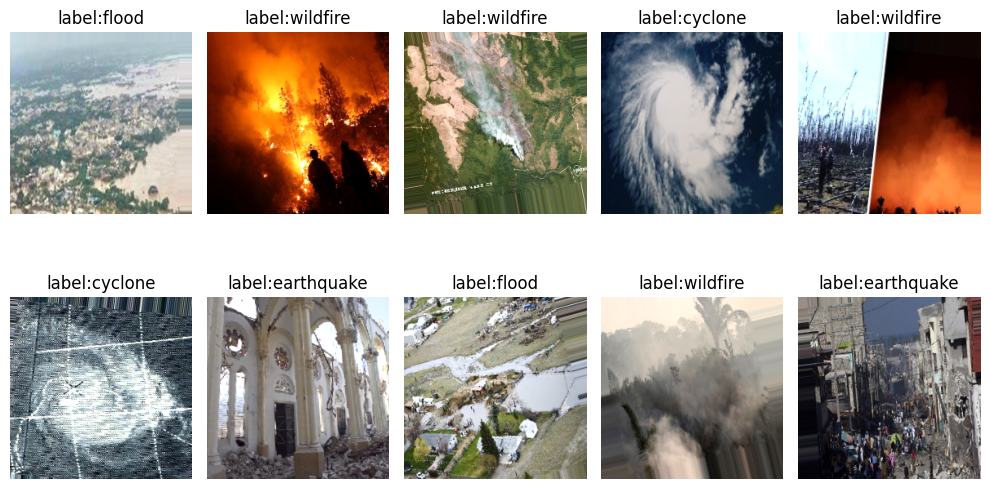

In [33]:
image,label = next(train_data)
class_name = list(train_data.class_indices.keys())

plt.figure(figsize = (10,6))
for i in range (10):
    plt.subplot(2,5, i+1)
    plt.imshow(image[i])
    label_index = int(label[i])
    plt.title(f'label:{class_name[label_index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
train_data = train_data_gen.flow_from_directory(
    '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train',
    target_size=(224,224),
    batch_size= 40,
    class_mode = 'sparse'
    
)
test_data = train_data_gen.flow_from_directory(
    '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test',
    target_size=(224,224),
    batch_size= 40,
    class_mode = 'sparse'
    
)
val_data = train_data_gen.flow_from_directory(
    '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation',
    target_size=(224,224),
    batch_size= 40,
    class_mode = 'sparse'
    
)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [35]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_name), activation='softmax')
])

In [36]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [27]:
#Model Eğitimi
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.3460 - loss: 1.5115 - val_accuracy: 0.6725 - val_loss: 0.9340
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.5928 - loss: 0.9623 - val_accuracy: 0.5650 - val_loss: 0.9907
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.7227 - loss: 0.7244 - val_accuracy: 0.7900 - val_loss: 0.5896
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.7893 - loss: 0.6055 - val_accuracy: 0.8225 - val_loss: 0.5070
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.8163 - loss: 0.5102 - val_accuracy: 0.7600 - val_loss: 0.6264
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7916 - loss: 0.5835 - val_accuracy: 0.8550 - val_loss: 0.4495
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.8402 - loss: 0.4519 - val_accuracy: 0.8350 - val_loss: 0.4421
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8634 - loss: 0.3949 - val_accuracy: 0.8325 - v

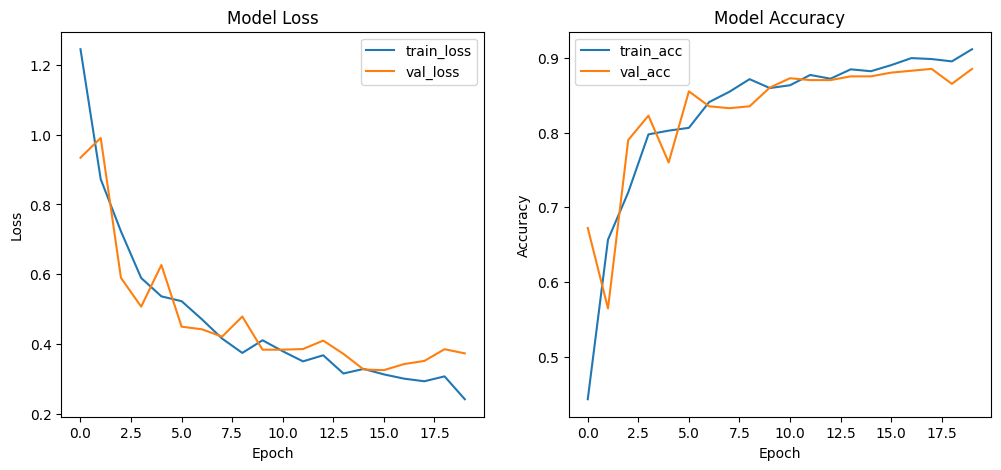

In [38]:
#Eğitim Sonuçlarını Görselleştirme

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [39]:
#Test Verisi ile Değerlendirme

test_loss, test_acc = model.evaluate(test_data)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2434 - loss: 1.3928
Test Loss: 1.3917, Test Accuracy: 0.2500
